In [118]:
import pandas as pd

df = pd.read_csv('Main_task_data_training.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

"""
print("HEAD")
print(df.head())
print('==" * 100')
print("SHAPE")
print(df.shape)
print("==" * 100)
print("INFO")
print(df.info())
print("==" * 100)
print(df)
print(df.columns)

"""
print(len(df.columns))
for column in df.columns:
    if df[column].count()/ 500000 < 0.51:
        print(f"{column}:", df[column].count()/500000)

print(df.head())
#print(df['SUBTYPE','SHARE', 'RENEWABLE_ENERGY_HEATING', 'RENEWABLE_ENERGY_ELECTRIC', 'CERTIFICATE_PHI',"COMMUNITY", ''])

df.drop(columns=['SUBTYPE','SHARE', 'RENEWABLE_ENERGY_HEATING', 'RENEWABLE_ENERGY_ELECTRIC', 'CERTIFICATE_PHI',"COMMUNITY", 'UTIL_WATER_INTAKE', 'UTIL_WATER_SUPPLY', 'UTIL_ELECTRICITY',
        'UTIL_GAS', 'UTIL_SEWAGE_SYSTEM_CONNECTION', 'UTIL_SEWAGE_SYSTEM_OWN', 'UTIL_SEWAGE_SYSTEM_CONNECTION', 'PREMISSES_STANDARD', 'PREMISSES_INDEX_PED', 'PREMISSES_INDEX_FED', 'PREMISSES_INDEX_UED',
        'PREMISSES_ENERGY_PERF_CERT_DATE', 'PREMISSES_ENERGY_PERF_CERT_VALI', 'PREMISSES_RES_SHARE', 'PREMISSES_CO2_EMMISSION', 'BUILDING_CHAMBER_NO', 'BUILDING_INDEX_PED', 'BUILDING_INDEX_FED',
        'BUILDING_INDEX_UED', 'BUILDING_ENERGY_PERF_CERT_DATE', 'BUILDING_ENERGY_PERF_CERT_VALI', 'BUILDING_RES_SHARE', 'BUILDING_CO2_EMMISSION', 'PARKING_SPACE_ID', 'PARKING_KIND', 'NUMBER'],
        inplace =True)
print(len(df.columns))

for column in df.columns:
    print(f"{column}:", df[column].count()/500000)


C:\Users\wojte\AppData\Local\Temp\ipykernel_29432\12335195.py:3: DtypeWarning: Columns (2,5,6,7,8,9,10,11,12,13,19,20,21,23,26,27,33,38,51,54,55,57,59,63,65,69,70,71,72,73,74,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Main_task_data_training.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')


82
SUBTYPE: 0.002524
SHARE: 0.000468
RENEWABLE_ENERGY_HEATING: 0.008738
RENEWABLE_ENERGY_ELECTRIC: 0.008738
CERTIFICATE_PHI: 0.008738
UTIL_WATER_INTAKE: 0.000514
UTIL_WATER_SUPPLY: 0.000514
UTIL_ELECTRICITY: 0.000514
UTIL_GAS: 0.000514
UTIL_SEWAGE_SYSTEM_CONNECTION: 0.000514
UTIL_SEWAGE_SYSTEM_OWN: 0.000514
STOREY: 0.48523
PREMISSES_STANDARD: 3.4e-05
PREMISSES_INDEX_PED: 0.028374
PREMISSES_INDEX_FED: 0.02835
PREMISSES_STANDARD_QUALITY: 0.45404
PREMISSES_INDEX_UED: 0.02836
PREMISSES_ENERGY_PERF_CERT_DATE: 0.029894
PREMISSES_ENERGY_PERF_CERT_VALI: 0.029058
PREMISSES_RES_SHARE: 0.02812
PREMISSES_CO2_EMMISSION: 0.028306
CITY_ZONE: 0.022318
FLOORS_NO: 0.271016
BUILDING_CHAMBER_NO: 0.121124
BUILDING_INDEX_PED: 0.011816
BUILDING_INDEX_FED: 0.010334
BUILDING_INDEX_UED: 0.011704
BUILDING_ENERGY_PERF_CERT_DATE: 0.010998
BUILDING_ENERGY_PERF_CERT_VALI: 0.010568
BUILDING_RES_SHARE: 0.010268
BUILDING_CO2_EMMISSION: 0.010326
PARCEL_AREA: 0.225032
PARKING_SPACE_ID: 0.001656
PARKING_KIND: 0.001654
NUM

In [119]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(
        lambda x: x.encode('ISO-8859-1').decode('utf-8') if isinstance(x, str) else x
    )

print(df["CITY"].nunique())
print(df["CITY"].unique().tolist())



15379
['Bolesławiec', 'Kruszyn', 'OTOK', 'KRAŚNIK DOLNY', 'Osła', 'Trzebień', 'BOLESŁAWICE', 'CZERNA', 'Tomaszów Bolesławiecki', 'Bożejowice', 'Świętoszów', 'BOLESŁAWIEC', 'Milików', 'Zebrzydowa', 'ŚWIĘTOSZÓW', 'Nowogrodziec', 'Warta Bolesławiecka', 'WARTA BOLESŁAWIECKA', 'OSIECZNICA', 'Szczytnica', 'Brzeźnik', 'Nowa Kuźnia', 'PAROWA', 'WARTOWICE', 'DOBRA', 'Dobra', 'MILIKÓW', 'Stare Jaroszowice', 'KRUSZYN', 'Gromadka', 'Nowa Wieś', 'Raciborowice Górne', 'Ławszowa', 'IWINY', 'NOWOGRODZIEC', 'Wykroty', 'Łąka', 'STARE JAROSZOWICE', 'OSIECZÓW', 'Iwiny', 'Kraśnik Dolny', 'Tomisław', 'Suszki', 'Rakowice', 'Nowe Jaroszowice', 'Wartowice', 'MODŁA', 'Osiecznica', 'Motyle', 'Parzyce', 'Łaziska', 'Różyniec', 'Krępnica', 'Czerna', 'Gierałtów', 'Dąbrowa Bolesławiecka', 'BRZEŹNIK', 'TOMASZÓW BOLESŁAWIECKI', 'MIERZWIN', 'SZCZYTNICA', 'Żeliszów', 'ZEBRZYDOWA', 'Kierżno', 'Ocice', 'GIERAŁTÓW', 'KRZYŻOWA', 'Krzyżowa', 'PASTERNIK', 'GROMADKA', 'LIPIANY', 'ŁAZISKA', 'Bolesławice', 'Kraśnik Górny', 'Zabło

In [120]:
# 1. List of voivodeship capitals
voivodeship_capitals = [
    "Warszawa", "Kraków", "Łódź", "Wrocław", "Poznań", "Gdańsk", "Szczecin",
    "Bydgoszcz", "Lublin", "Białystok", "Katowice", "Kielce", "Olsztyn",
    "Rzeszów", "Opole", "Zielona Góra"
]

# 2. Clean the CITY column
df['CITY_CLEAN'] = df['CITY'].astype(str).str.strip().str.title()

# 3. Mark capitals
df['IS_CAPITAL'] = df['CITY_CLEAN'].apply(lambda x: 1 if x in voivodeship_capitals else 0)

# 4. (Optional) Print check
print(df[['CITY', 'CITY_CLEAN', 'IS_CAPITAL']].drop_duplicates())
print(df["IS_CAPITAL"].value_counts())

                  CITY      CITY_CLEAN  IS_CAPITAL
0          Bolesławiec     Bolesławiec           0
5              Kruszyn         Kruszyn           0
14                OTOK            Otok           0
15       KRAŚNIK DOLNY   Kraśnik Dolny           0
18                Osła            Osła           0
...                ...             ...         ...
499914           GŁUSK           Głusk           0
499918        TRZCIANE        Trzciane           0
499922        LUBOMINO        Lubomino           0
499965      SUCHATÓWKA      Suchatówka           0
499973  KOCZARGI STARE  Koczargi Stare           0

[15380 rows x 3 columns]
IS_CAPITAL
0    267431
1    232569
Name: count, dtype: int64


In [121]:
# Print raw values for inspection
print(repr(df['VALUE_DATE'].iloc[:10].tolist()))

# Convert VALUE_DATE to datetime (assuming format 'YYYY-MM-DD')
df['VALUE_DATE'] = pd.to_datetime(df['VALUE_DATE'], format='%Y-%m-%d', errors='coerce')

# Define the maximum allowed date (as a Timestamp)
max_date = pd.to_datetime("2025-04-02", format='%Y-%m-%d')

# Replace any date later than max_date with max_date
df.loc[df['VALUE_DATE'] > max_date, 'VALUE_DATE'] = max_date
df['VALUE_DATE'] = df['VALUE_DATE'].fillna(max_date)
# Create a new column with quarter information (format like '2014Q1')
df['VALUE_DATE_quarter'] = df['VALUE_DATE'].dt.to_period('Q').astype(str)


# Check the quarter column
print(df['VALUE_DATE_quarter'].head(100))

['14.02.2014', '14.02.2014', '05.08.2014', '01.07.2014', '26.11.2014', '06.02.2014', '19.12.2014', '21.03.2014', '17.01.2014', '03.01.2014']
0     2025Q2
1     2025Q2
2     2025Q2
3     2025Q2
4     2025Q2
       ...  
95    2025Q2
96    2025Q2
97    2025Q2
98    2025Q2
99    2025Q2
Name: VALUE_DATE_quarter, Length: 100, dtype: object


C:\Users\wojte\AppData\Local\Temp\ipykernel_29432\168292707.py:2: DtypeWarning: Columns (13,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Main_task_data_training_cleaned.csv', encoding='utf-8-sig', sep=';', on_bad_lines='skip')


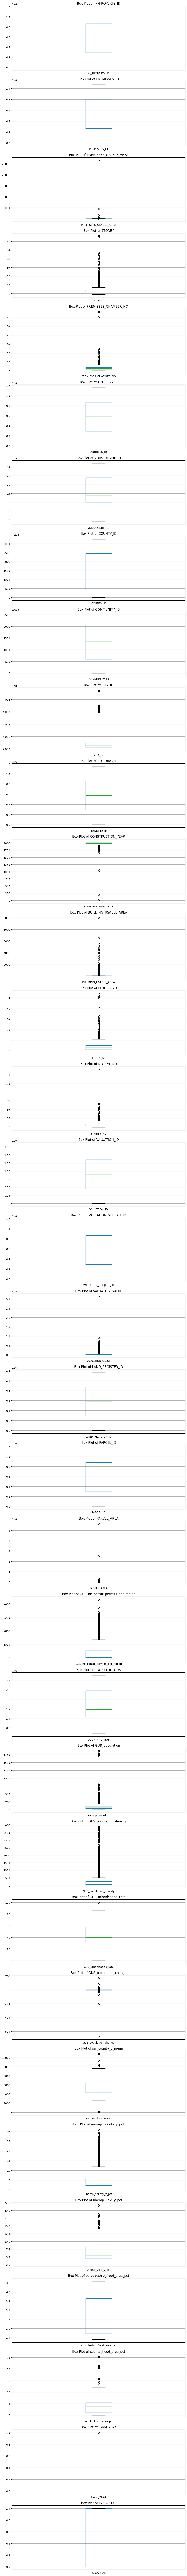

In [122]:
import matplotlib.pyplot as plt
df = pd.read_csv('Main_task_data_training_cleaned.csv', encoding='utf-8-sig', sep=';', on_bad_lines='skip')
# Get numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the number of plots
n_plots = len(numerical_cols)

# Create subplots (one row per numerical column)
fig, axes = plt.subplots(n_plots, 1, figsize=(10, 4 * n_plots))
if n_plots == 1:
    axes = [axes]  # Ensure axes is iterable for a single plot

# Loop through each numerical column and plot its box plot
for ax, col in zip(axes, numerical_cols):
    df.boxplot(column=col, ax=ax)
    ax.set_title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()





In [123]:
from sklearn.preprocessing import LabelEncoder

exclude_columns = ['CITY_CLEAN', 'VALUE_DATE_quarter']
encoders = {}

def normalize_value(x):
    if isinstance(x, str):
        return x.strip().lower()[:5]
    return x

for col in df.select_dtypes(include=['object']).columns:
    if col not in exclude_columns:
        le = LabelEncoder()
        # Normalize each value before encoding
        normalized_series = df[col].astype(str).apply(normalize_value)
        df[col] = le.fit_transform(normalized_series)
        encoders[col] = le
        
        # Build and print the mapping of normalized values to encoded values
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Encoding for column '{col}':")
        print(mapping)
        print("-" * 40)


Encoding for column 'PROPERTY_KIND':
{'budyn': 0, 'centr': 1, 'grunt': 2, 'lokal': 3, 'nan': 4, 'nieru': 5, 'parki': 6}
----------------------------------------
Encoding for column 'MARKET_TYPE':
{'nan': 0, 'pierw': 1, 'wtórn': 2}
----------------------------------------
Encoding for column 'PREMISSES_TECHNICAL_CONDITION':
{'bardz': 0, 'dobry': 1, 'nan': 2, 'zły': 3, 'średn': 4}
----------------------------------------
Encoding for column 'PREMISSES_STANDARD_QUALITY':
{'brak ': 0, 'dewel': 1, 'do re': 2, 'nan': 3, 'niski': 4, 'pod k': 5, 'wysok': 6, 'średn': 7}
----------------------------------------
Encoding for column 'VOIVODESHIP':
{'dolno': 0, 'kujaw': 1, 'lubel': 2, 'lubus': 3, 'mazow': 4, 'małop': 5, 'nan': 6, 'opols': 7, 'podka': 8, 'podla': 9, 'pomor': 10, 'warmi': 11, 'wielk': 12, 'zacho': 13, 'łódzk': 14, 'śląsk': 15, 'święt': 16}
----------------------------------------
Encoding for column 'COUNTY':
{'aleks': 0, 'augus': 1, 'barto': 2, 'bełch': 3, 'bials': 4, 'biała': 5, 'b

In [124]:
# Ensure the column is numeric
df['CONSTRUCTION_YEAR'] = pd.to_numeric(df['CONSTRUCTION_YEAR'], errors='coerce')

# Compute the mean using only values that are 500 or higher
valid_mean = df.loc[df['CONSTRUCTION_YEAR'] >= 500, 'CONSTRUCTION_YEAR'].mean()

# Replace values lower than 500 with the computed mean
df.loc[df['CONSTRUCTION_YEAR'] < 500, 'CONSTRUCTION_YEAR'] = valid_mean

# Replace NaN values with the computed mean
df['CONSTRUCTION_YEAR'] = df['CONSTRUCTION_YEAR'].fillna(valid_mean)





{'whiskers': [<matplotlib.lines.Line2D at 0x2a34abd6f90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a34abd77d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a34abd6bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a34abd7f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a34abd6cf0>],
 'means': []}

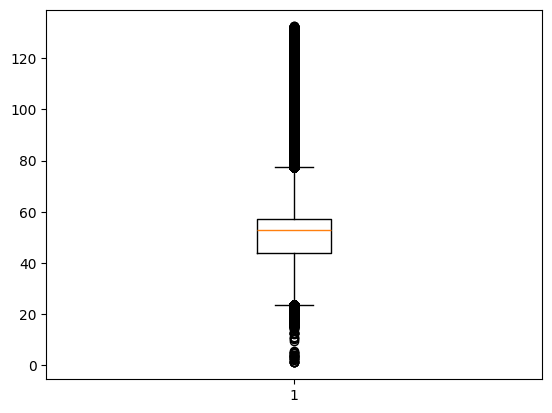

In [125]:
# Ensure the column is numeric
df['PREMISSES_USABLE_AREA'] = pd.to_numeric(df['PREMISSES_USABLE_AREA'], errors='coerce')

# Calculate the 99th percentile threshold
threshold = df['PREMISSES_USABLE_AREA'].quantile(0.99)

# Compute the valid mean using values that are less than or equal to the threshold
valid_mean1 = df.loc[df['PREMISSES_USABLE_AREA'] <= threshold, 'PREMISSES_USABLE_AREA'].mean()

# Replace values larger than the 99th percentile threshold with the computed mean
df.loc[df['PREMISSES_USABLE_AREA'] > threshold, 'PREMISSES_USABLE_AREA'] = valid_mean1

# Replace NaN values with the computed mean
df['PREMISSES_USABLE_AREA'] = df['PREMISSES_USABLE_AREA'].fillna(valid_mean1)
plt.boxplot(df['PREMISSES_USABLE_AREA'])


In [126]:
df['STOREY'] = df['STOREY'].fillna(df['STOREY'].mean()).astype(int)
df['PARCEL_AREA'] = df['PARCEL_AREA'].fillna(df['PARCEL_AREA'].mean())
df['FLOORS_NO'] = df['FLOORS_NO'].fillna(df['FLOORS_NO'].mean()).astype(int)
df.dropna(inplace=True)
df.shape

(291288, 54)

In [127]:
voivodeship_mapping = {
    'dolno': 0, 'kujaw': 1, 'lubel': 2, 'lubus': 3, 'mazow': 4, 'małop': 5,
    'nan': 6, 'opols': 7, 'podka': 8, 'podla': 9, 'pomor': 10, 'warmi': 11,
    'wielk': 12, 'zacho': 13, 'łódzk': 14, 'śląsk': 15, 'święt': 16
}

# Normalize the VOIVODESHIP column: lower case and first five characters
df['VOIVODESHIP_norm'] = df['VOIVODESHIP'].astype(str).apply(lambda x: x.lower()[:5])
df['VOIVODESHIP_code'] = df['VOIVODESHIP_norm'].map(voivodeship_mapping)
# Create datasets for primary and secondary market types
df_pierw = df[df['MARKET_TYPE'] == 1].copy()
df_wtorn = df[df['MARKET_TYPE'] == 2].copy()
df_nieokr = df[df['MARKET_TYPE'] == 0].copy()







In [128]:
print(df.head())

    ï»¿PROPERTY_ID  PROPERTY_KIND  MARKET_TYPE  PREMISSES_ID  \
79        310998.0              3            2      941259.0   
80        888316.0              3            2      425861.0   
81        590330.0              3            2     1003960.0   
82        909817.0              3            2      555407.0   
83        399371.0              3            2         422.0   

    PREMISSES_USABLE_AREA  PREMISSES_TECHNICAL_CONDITION  STOREY  \
79                  58.60                              1       3   
80                  68.77                              1       3   
81                  41.00                              4       3   
82                  37.50                              4       3   
83                  94.40                              4       3   

    PREMISSES_CHAMBER_NO  PREMISSES_STANDARD_QUALITY  ADDRESS_ID  ...  \
79                   4.0                           3   1145310.0  ...   
80                   5.0                           3    8655

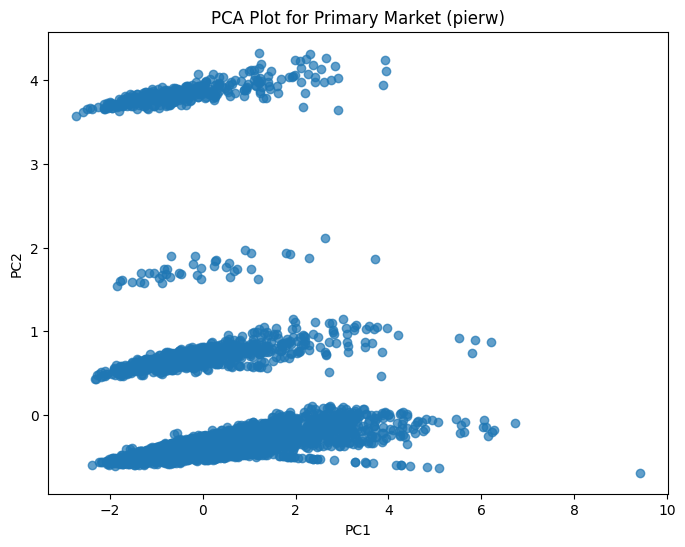

Large dataset detected (6654 points). Subsampling 1000 points for dendrogram.


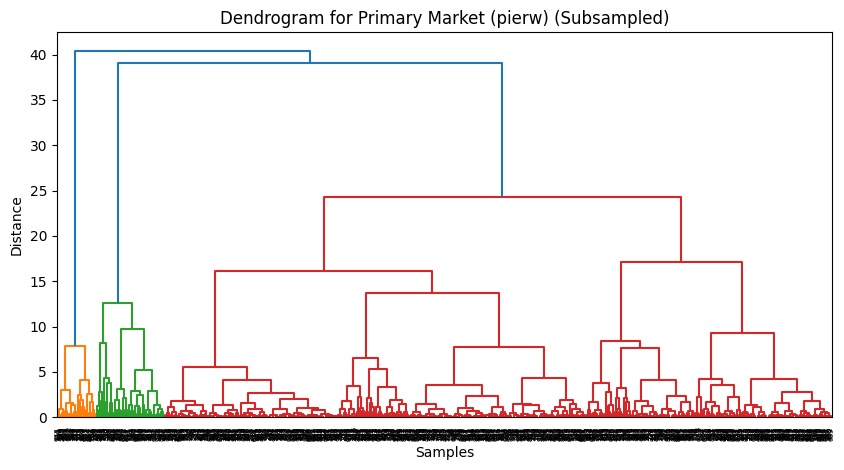

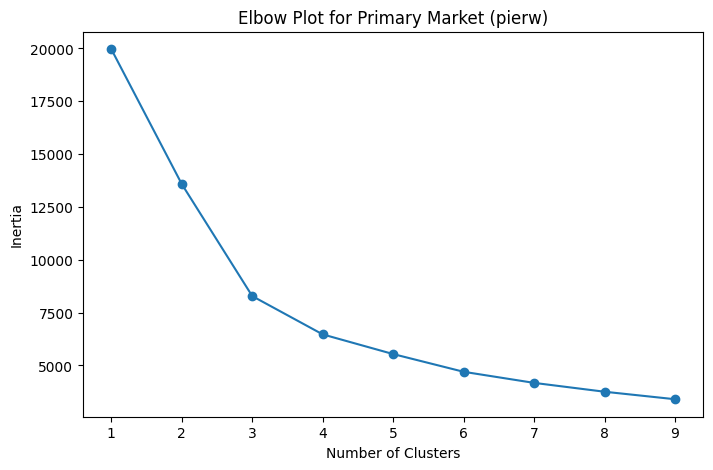


Cluster counts for Primary Market (pierw):
KMeans_Cluster
0     700
1    3147
2    2449
3     358
Name: count, dtype: int64


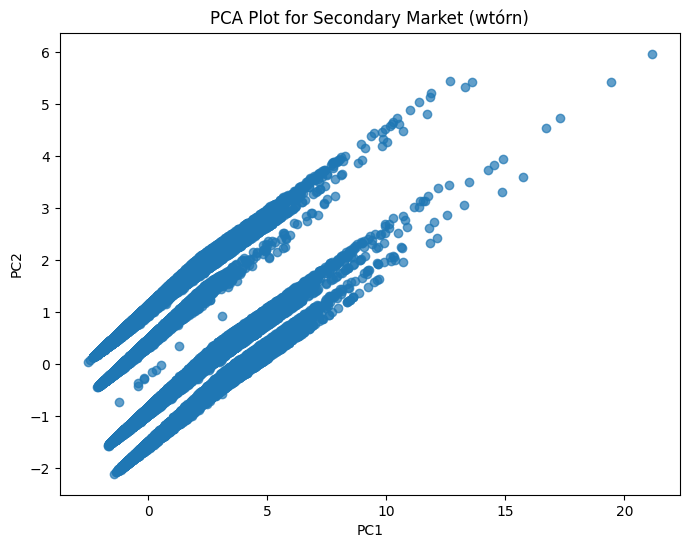

Large dataset detected (283428 points). Subsampling 1000 points for dendrogram.


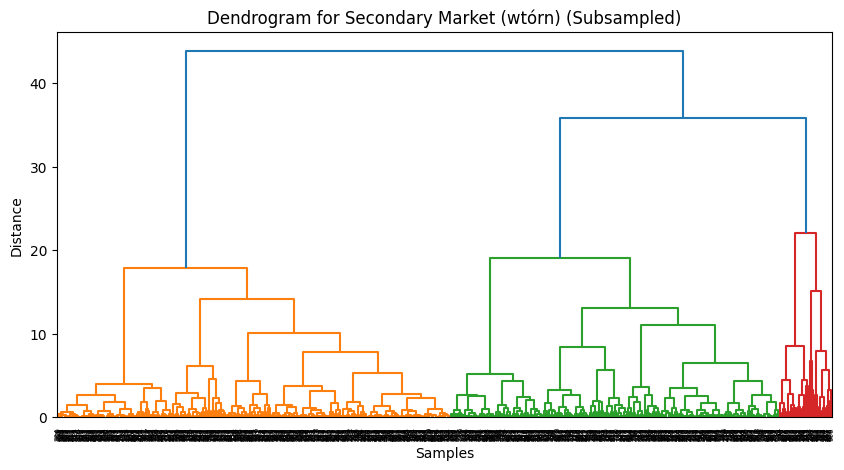

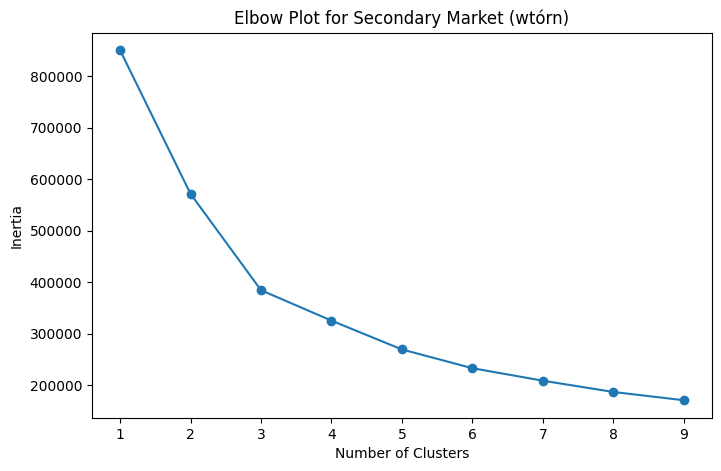


Cluster counts for Secondary Market (wtórn):
KMeans_Cluster
0    112042
1     50071
2     25351
3     95964
Name: count, dtype: int64


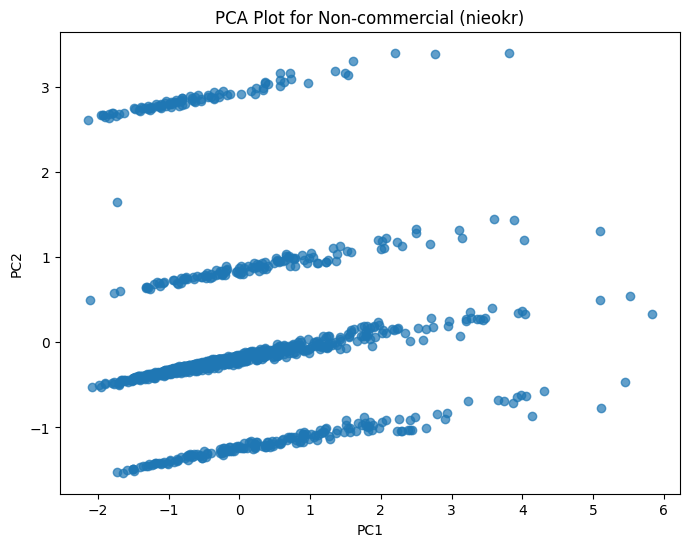

Large dataset detected (1206 points). Subsampling 1000 points for dendrogram.


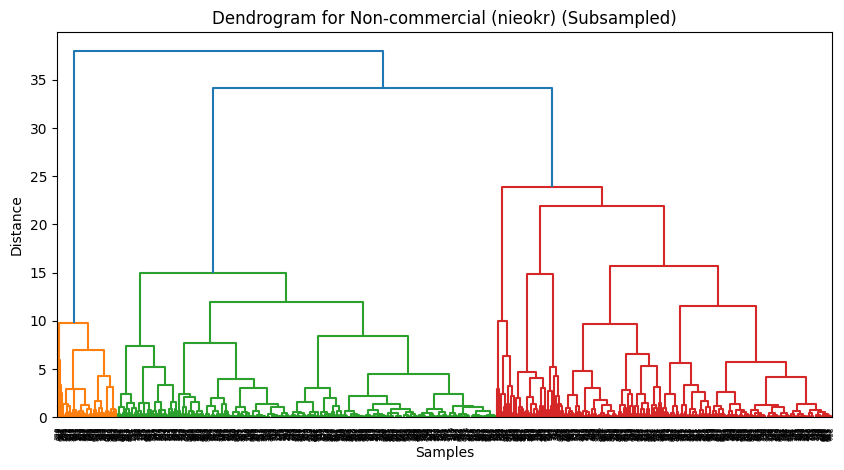

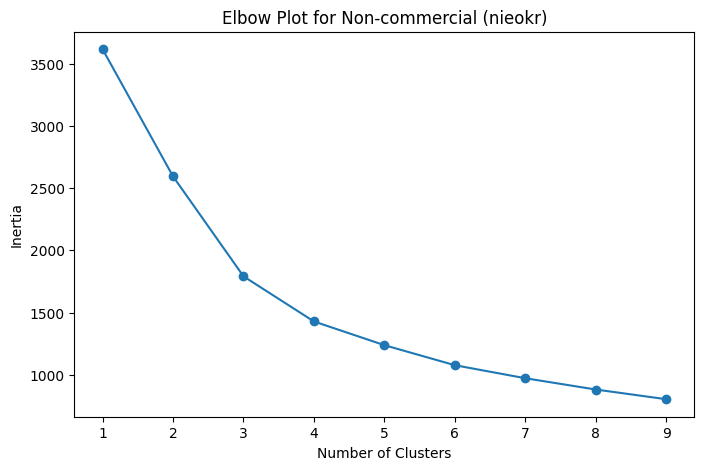


Cluster counts for Non-commercial (nieokr):
KMeans_Cluster
0    676
1     94
2    362
3     74
Name: count, dtype: int64


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# SPLIT THE DATAFRAME INTO SUBSETS BASED ON MARKET_TYPE
# -----------------------------
df_pierw = df[df['MARKET_TYPE'] == 1].copy()   # Primary market (pierw)
df_wtorn = df[df['MARKET_TYPE'] == 2].copy()   # Secondary market (wtórn)
df_nieokr = df[df['MARKET_TYPE'] == 0].copy()   # Other / non-commercial (nieokr)

# -----------------------------
# DEFINE THE FEATURES TO USE FOR CLUSTERING
# -----------------------------
feature_cols = ['PREMISSES_USABLE_AREA', 'PREMISSES_TECHNICAL_CONDITION', 'VALUATION_VALUE']

# -----------------------------
# FUNCTION: CLUSTER ANALYSIS FOR A GIVEN DATASET
# -----------------------------
def cluster_analysis(df_subset, subset_name):
    # Drop rows with missing values for the selected features
    df_subset = df_subset.dropna(subset=feature_cols)
    
    # Extract feature matrix and scale it
    X = df_subset[feature_cols].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # -----------------------------
    # PCA Plot for Visualization
    # -----------------------------
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Plot for {subset_name}')
    plt.show()
    
    # -----------------------------
    # Hierarchical Clustering Dendrogram
    # -----------------------------
    # If dataset is large, subsample to avoid memory issues.
    sample_size = 1000
    if X_scaled.shape[0] > sample_size:
        print(f"Large dataset detected ({X_scaled.shape[0]} points). Subsampling {sample_size} points for dendrogram.")
        sample_idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
        X_sample = X_scaled[sample_idx]
    else:
        X_sample = X_scaled

    linked = sch.linkage(X_sample, method='ward')
    plt.figure(figsize=(10,5))
    sch.dendrogram(linked)
    plt.title(f'Dendrogram for {subset_name} (Subsampled)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
    # -----------------------------
    # Elbow Plot for KMeans
    # -----------------------------
    inertia = []
    K_range = range(1, 10)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Plot for {subset_name}')
    plt.show()
    
    # -----------------------------
    # Choose the Number of Clusters Interactively
    # -----------------------------
    optimal_k = int(input(f"Enter the optimal number of clusters for {subset_name}: "))
    
    # -----------------------------
    # Final KMeans Clustering and Assignment
    # -----------------------------
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans_final.fit_predict(X_scaled)
    df_subset['KMeans_Cluster'] = clusters
    
    print(f"\nCluster counts for {subset_name}:")
    print(df_subset['KMeans_Cluster'].value_counts().sort_index())
    
    return df_subset, scaler

# -----------------------------
# RUN CLUSTER ANALYSIS ON EACH SUBSET
# -----------------------------
df_pierw_clustered, scaler_pierw = cluster_analysis(df_pierw, "Primary Market (pierw)")
df_wtorn_clustered, scaler_wtorn = cluster_analysis(df_wtorn, "Secondary Market (wtórn)")
df_nieokr_clustered, scaler_nieokr = cluster_analysis(df_nieokr, "Non-commercial (nieokr)")
